# Bayesian analyses and MCMC

## Defining priors

In [1]:
from likelihood import Priors, LikelihoodFunction
from equations import DM_EXT_model

model = DM_EXT_model()

# Defining the prior intervals manually
intervals_constant = [(0, 1), (55, 225)]  # Interval for f_IGM and DM_host_0
intervals_p2 = [(0, 1), (55, 225), (0, 5)]  # Intervals for f_IGM, DM_host_0 and alpha
intervals_p3 = [(0, 1), (55, 225), (0, 5)]  # Intervals for f_IGM, DM_host_0 and alpha
intervals_p4 = [(0, 1), (55, 225), (-5, 5)]  # Intervals for f_IGM, DM_host_0 and s

# Creating specific instances of the priors
P_constant = Priors(['f_{IGM}', 'DM_{host,0}'], intervals_constant)
P_p2 = Priors(['f_{IGM}', 'DM_{host,0}', '\\alpha'], intervals_p2)
P_p3 = Priors(['f_{IGM}', 'DM_{host,0}', '\\alpha'], intervals_p3)
P_p4 = Priors(['f_{IGM}', 'DM_{host,0}', 's'], intervals_p4)

# Creating an instance of the likelihood model
LF_constant = LikelihoodFunction(
    lambda z, f_IGM, DM_host_0: model.DM_ext_th(
        z=z,
        f_IGM=f_IGM,
        DM_host_0=DM_host_0,
        model_type='constant',
        Omega_b=0.0408,  
        Omega_m=0.3,     
        H_today=70.0,    
        param=None
    )
)

LF_p2 = LikelihoodFunction(
    lambda z, f_IGM, DM_host_0, alpha: model.DM_ext_th(
        z=z,
        f_IGM=f_IGM,
        DM_host_0=DM_host_0,
        model_type='p2',
        Omega_b=0.0408,  
        Omega_m=0.3,    
        H_today=70.0,    
        param=alpha
    )
)

LF_p3 = LikelihoodFunction(
    lambda z, f_IGM, DM_host_0, alpha: model.DM_ext_th(
        z=z,
        f_IGM=f_IGM,
        DM_host_0=DM_host_0,
        model_type='p3',
        Omega_b=0.0408,  
        Omega_m=0.3,    
        H_today=70.0,    
        param=alpha
    )
)

LF_p4 = LikelihoodFunction(
    lambda z, f_IGM, DM_host_0, s: model.DM_ext_th(
        z=z,
        f_IGM=f_IGM,
        DM_host_0=DM_host_0,
        model_type='p4',
        Omega_b=0.0408, 
        Omega_m=0.3,   
        H_today=70.0,    
        param=s
    )
)

## Preparing the samples

### Analysis for 16 FRBs

In [2]:
from obs_data import FRB_data
import ultranest

# Instantiate the FRB_data class for 16 FRBs
frb_data_16 = FRB_data(n_frb=16)

# Call the select_data method to get the observed data
z_obs_16, DM_obs_ext_16, DM_obs_ext_error_16 = frb_data_16.select_data()

z_values_16 = z_obs_16
dm_ext_obs_16 = DM_obs_ext_16
dm_ext_errors_16 =  DM_obs_ext_error_16

# Configuring the ultranest samplers
sampler_constant_16 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_constant.prior_transform
)

sampler_p2_16 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p2.prior_transform
)

sampler_p3_16 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p3.prior_transform
)

sampler_p4_16 = ultranest.ReactiveNestedSampler(
    P_p4.param_names,
    lambda params: LF_p4.log_likelihood(
        params,
        z_values=z_values_16,
        y_obs=dm_ext_obs_16,
        errors=dm_ext_errors_16
    ),
    P_p4.prior_transform
)

### Analysis for 50 FRBs

In [3]:
# Instantiate the FRB_data class for 50 FRBs
frb_data_50 = FRB_data(n_frb=50)

# Call the select_data method to get the observed data
z_obs_50, DM_obs_ext_50, error_plus_50, error_minus_50 = frb_data_50.select_data()

z_values_50 = z_obs_50
dm_ext_obs_50 = DM_obs_ext_50
dm_error_plus_50 =  error_plus_50
dm_error_minus_50 =  error_minus_50

# Configuring the ultranest samplers
sampler_constant_50 = ultranest.ReactiveNestedSampler(
    P_constant.param_names,
    lambda params: LF_constant.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_constant.prior_transform
)

sampler_p2_50 = ultranest.ReactiveNestedSampler(
    P_p2.param_names,
    lambda params: LF_p2.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p2.prior_transform
)

sampler_p3_50 = ultranest.ReactiveNestedSampler(
    P_p3.param_names,
    lambda params: LF_p3.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p3.prior_transform
)

sampler_p4_50 = ultranest.ReactiveNestedSampler(
    P_p4.param_names,
    lambda params: LF_p4.log_likelihood(
        params,
        z_values=z_values_50,
        y_obs=dm_ext_obs_50,
        err_pos=error_plus_50,
        err_neg=error_minus_50
    ),
    P_p4.prior_transform
)

In [4]:
result1_16 = sampler_constant_16.run(min_num_live_points=400)
sampler_constant_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+02  .36 [-553.3747..-553.3746]*| it/evals=4410/6134 eff=76.9097% N=400  
[ultranest] Likelihood function evaluations: 6141
[ultranest]   logZ = -559.8 +- 0.09761
[ultranest] Effective samples strategy satisfied (ESS = 1593.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.

logZ = -559.804 +- 0.219
  single instance: logZ = -559.804 +- 0.117
  bootstrapped   : logZ = -559.806 +- 0.219
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    f_{IGM}             : 0.760 │ ▁  ▁▁▁▁▁▁▂▂▃▃▄▅▆▇▇▇▇▇▆▅▅▅▃▂▂▂▁▁▁▁▁▁▁▁ │0.870     0.816 +- 0.014
    DM_{host,0}         : 138.3 │ ▁▁▁▁▁▁▁▁▂▃▃▄▃▅▆▆▇▆▇▆▆▅▅▄▄▃▂▁▂▁▁▁▁▁▁▁▁ │178.6     158.0 +- 5.5



In [5]:
result1_50 = sampler_constant_50.run(min_num_live_points=400)
sampler_constant_50.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+03  101.45 [-6101.5042..-6101.5042]*| it/evals=6472/8628 eff=78.6582% N=400  
[ultranest] Likelihood function evaluations: 8631
[ultranest]   logZ = -6113 +- 0.1057
[ultranest] Effective samples strategy satisfied (ESS = 1898.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -6113.061 +- 0.285
  single instance: logZ = -6113.061 +- 0.159
  bootstrapped   : logZ = -6113.049 +- 0.285
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    f_{IGM}             : 0.99590│ ▁▁   ▁▁ ▁ ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▃▃▄▅▆▇│1.00000    0.99957 +- 0.00044
    DM_{host,0}         : 110.7 │ ▁▁▁▁▁▁▁▁▁▂▃▃▄▅▆▆▇▇▇▇▇▅▅▄▃▂▃▁▁▁▁▁▁▁▁▁▁ │124.1     117.1 +- 1.7



In [6]:
result2_16 = sampler_p2_16.run(min_num_live_points=400)
sampler_p2_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+02  .81 [-543.8718..-543.8716]*| it/evals=5200/9012 eff=60.3809% N=400  
[ultranest] Likelihood function evaluations: 9022
[ultranest]   logZ = -552.3 +- 0.1056
[ultranest] Effective samples strategy satisfied (ESS = 1949.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -552.264 +- 0.211
  single instance: logZ = -552.264 +- 0.131
  bootstrapped   : logZ = -552.284 +- 0.211
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    f_{IGM}             : 0.273 │ ▁ ▁▁▁▁▁▁▁▂▂▃▄▄▅▆▇▇▇▇▇▇▅▅▄▃▃▂▂▁▁▁▁▁▁▁▁ │0.774     0.529 +- 0.068
    DM_{host,0}         : 157.3 │ ▁▁▁▁▁▁▁▁▂▂▄▄▅▅▆▅▇▇▇▆▆▆▅▄▄▂▂▂▂▁▁▁▁▁▁ ▁▁│225.0     189.8 +- 9.3
    \alpha              : 0.13 

In [7]:
result2_50 = sampler_p2_50.run(min_num_live_points=400)
sampler_p2_50.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+03  958.73 [-5958.7783..-5958.7782]*| it/evals=6120/10998 eff=57.7467% N=400 
[ultranest] Likelihood function evaluations: 10999
[ultranest]   logZ = -5969 +- 0.1088
[ultranest] Effective samples strategy satisfied (ESS = 1818.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -5969.459 +- 0.303
  single instance: logZ = -5969.459 +- 0.153
  bootstrapped   : logZ = -5969.456 +- 0.303
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    f_{IGM}             : 0.861 │ ▁   ▁▁▁▁▁▁▁▁▂▂▂▂▂▃▃▅▅▆▆▆▇▇▇▇▇▆▅▄▄▄▃▂▂▂│1.000     0.954 +- 0.021
    DM_{host,0}         : 98.4  │ ▁▁▁▁▁▁▁▁▂▂▃▄▅▆▅▇▇▇▅▆▅▄▄▃▂▂▂▁▁▁▁▁▁▁▁ ▁ │120.4     108.6 +- 2.8
    \alpha             

In [8]:
result3_16 = sampler_p3_16.run(min_num_live_points=400)
sampler_p3_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+02  .01 [-547.0744..-547.0743]*| it/evals=5240/9013 eff=60.8383% N=400  
[ultranest] Likelihood function evaluations: 9047
[ultranest]   logZ = -555.6 +- 0.1056
[ultranest] Effective samples strategy satisfied (ESS = 1946.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -555.592 +- 0.171
  single instance: logZ = -555.592 +- 0.132
  bootstrapped   : logZ = -555.623 +- 0.170
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    f_{IGM}             : 0.284 │ ▁▁▁▁▁▁▁▂▂▂▃▄▅▅▇▇▇▇▇▇▇▇▅▅▃▂▂▂▁▁▁▁▁▁▁▁▁ │0.849     0.555 +- 0.076
    DM_{host,0}         : 149.0 │ ▁▁▁▁▁▁▁▁▂▂▂▃▄▅▅▇▇▇▇▇▆▅▅▅▃▃▂▂▁▁▁▁▁▁▁ ▁ │224.5     185.7 +- 9.5
    \alpha              : 0.00 

In [9]:
result3_50 = sampler_p3_50.run(min_num_live_points=400)
sampler_p3_50.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+03  981.45 [-5981.5965..-5981.5962]*| it/evals=6782/13325 eff=52.4720% N=400 
[ultranest] Likelihood function evaluations: 13330
[ultranest]   logZ = -5994 +- 0.1265
[ultranest] Effective samples strategy satisfied (ESS = 2066.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -5993.902 +- 0.188
  single instance: logZ = -5993.902 +- 0.162
  bootstrapped   : logZ = -5993.933 +- 0.188
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    f_{IGM}             : 0.9255│ ▁  ▁   ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▃▃▃▅▅▆▇▇│1.0000    0.9904 +- 0.0087
    DM_{host,0}         : 97.5  │ ▁▁▁▁▁▁▁▁▂▂▂▄▄▄▅▆▇▇▆▆▅▄▄▃▃▃▂▁▁▁▁▁▁▁▁▁▁ │113.6     105.2 +- 2.0
    \alpha           

In [10]:
result4_16 = sampler_p4_16.run(min_num_live_points=400)
sampler_p4_16.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+02  .09 [-551.2409..-551.2407]*| it/evals=6600/96451 eff=6.8713% N=400    0 0 0 
[ultranest] Likelihood function evaluations: 96464
[ultranest]   logZ = -563.1 +- 0.1155
[ultranest] Effective samples strategy satisfied (ESS = 2136.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.

logZ = -563.107 +- 0.328
  single instance: logZ = -563.107 +- 0.158
  bootstrapped   : logZ = -563.125 +- 0.328
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    f_{IGM}             : 0.242 │ ▁▁   ▁▁ ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▃▄▄▄▆▇│1.000     0.914 +- 0.084
    DM_{host,0}         : 137.0 │ ▁▁ ▁▁▁▁▁▁▁▂▃▃▅▄▆▆▇▇▆▇▆▅▅▄▃▃▃▁▁▁▁▁▁▁▁▁ │181.8     160.3 +- 5.6
    s                 

In [11]:
result4_50 = sampler_p4_50.run(min_num_live_points=400)
sampler_p4_50.print_results()

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-6e+03  990.39 [-5990.5379..-5990.5379]*| it/evals=8110/42122 eff=19.4382% N=400    0  
[ultranest] Likelihood function evaluations: 42124
[ultranest]   logZ = -6006 +- 0.1198
[ultranest] Effective samples strategy satisfied (ESS = 2144.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.19 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.

logZ = -6006.162 +- 0.286
  single instance: logZ = -6006.162 +- 0.185
  bootstrapped   : logZ = -6006.133 +- 0.286
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    f_{IGM}             : 0.9150│ ▁▁ ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▃▃▄▆▆▇│1.0000    0.9908 +- 0.0093
    DM_{host,0}         : 84.7  │ ▁▁▁ ▁▁▁▁▁▁▂▃▃▄▅▆▇▇▇▇▇▆▅▄▃▃▂▁▁▁▁▁▁▁▁ ▁ │104.3     94.6 +- 2.3
    s           

In [12]:
from getdist import plots, MCSamples

# Extraindo amostras dos resultados
samples1_16 = result1_16['samples']
samples2_16 = result2_16['samples']
samples3_16 = result3_16['samples']
samples4_16 = result4_16['samples']

samples1_50 = result1_50['samples']
samples2_50 = result2_50['samples']
samples3_50 = result3_50['samples']
samples4_50 = result4_50['samples']

# Criando objetos MCSamples com os dados
labels1 = P_constant.param_names
names1 = P_constant.param_names
mcsamples1_16 = MCSamples(samples=samples1_16, names=names1, labels=labels1)
mcsamples1_50 = MCSamples(samples=samples1_50, names=names1, labels=labels1)

labels2 = P_p2.param_names
names2 = P_p2.param_names
mcsamples2_16 = MCSamples(samples=samples2_16, names=names2, labels=labels2)
mcsamples2_50 = MCSamples(samples=samples2_50, names=names2, labels=labels2)

mcsamples3_16 = MCSamples(samples=samples3_16, names=names2, labels=labels2)
mcsamples3_50 = MCSamples(samples=samples3_50, names=names2, labels=labels2)

labels3 = P_p3.param_names
names3 = P_p3.param_names
mcsamples4_16 = MCSamples(samples=samples4_16, names=names3, labels=labels3)
mcsamples4_50 = MCSamples(samples=samples4_50, names=names3, labels=labels3)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


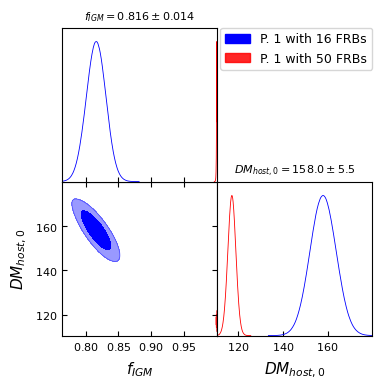

In [15]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples1_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples1_50.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples1_16, mcsamples1_50], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['P. 1 with 16 FRBs', 'P. 1 with 50 FRBs'], 
                title_limit=1)
g.export('Figuras/H_p1.png', dpi=600)

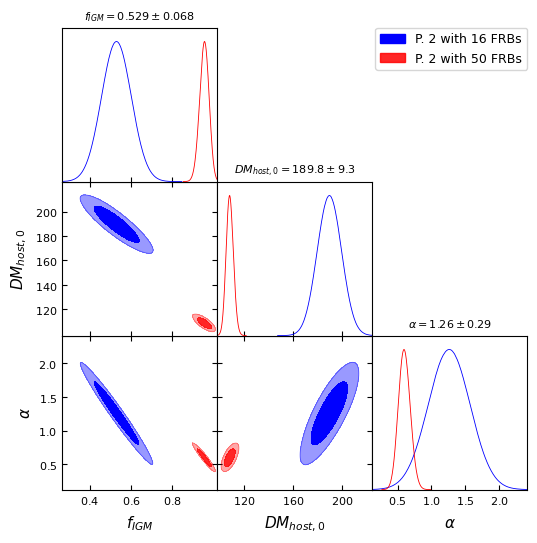

In [16]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples2_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples2_50.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples2_16, mcsamples2_50], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['P. 2 with 16 FRBs', 'P. 2 with 50 FRBs'], 
                title_limit=1)
g.export('Figuras/H_p2.png', dpi=600)

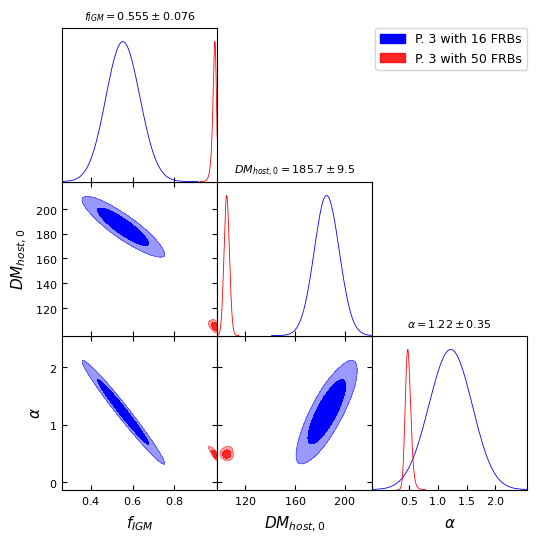

In [17]:
# Plotando os Triangle plots
g = plots.get_subplot_plotter()
mcsamples3_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples3_50.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples3_16, mcsamples3_50], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['P. 3 with 16 FRBs', 'P. 3 with 50 FRBs'], 
                title_limit=1)
g.export('Figuras/H_p3.png', dpi=600)

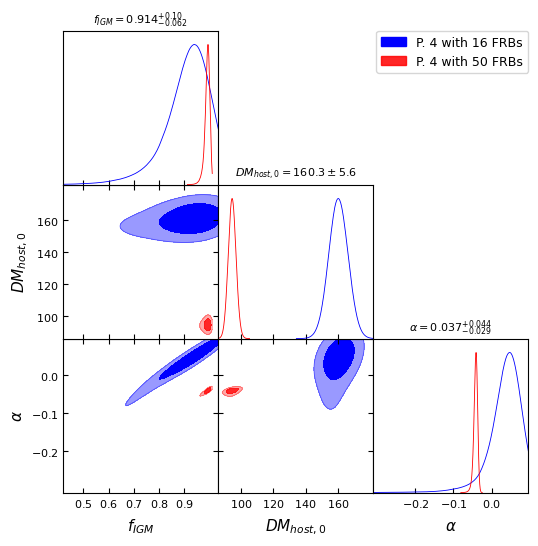

In [18]:
g = plots.get_subplot_plotter()
mcsamples4_16.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
mcsamples4_50.updateSettings({'smooth_scale_2D': 0.9, 'smooth_scale_1D': 0.9})
g.settings.num_plot_contours = 2
g.triangle_plot([mcsamples4_16, mcsamples4_50], filled=True, contour_colors=['blue', 'red'], 
                legend_labels=['P. 4 with 16 FRBs', 'P. 4 with 50 FRBs'], 
                title_limit=1)
g.export('Figuras/H_p4.png', dpi=600)

/tmp/ipykernel_19457/1809216964.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x=z_values_16, y=dm_ext_obs_16, fmt='ro', alpha=0.6, capsize=3, color='red', label='Data', ms=4)


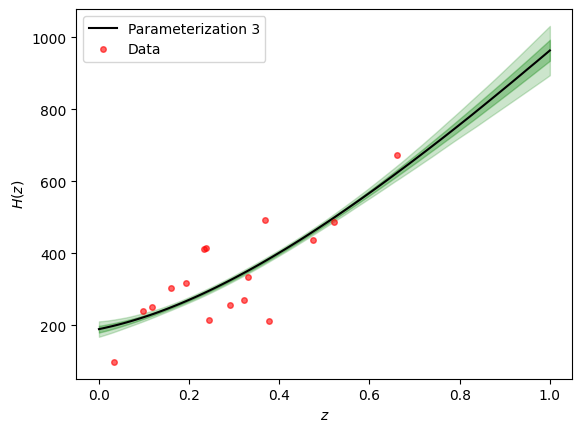

In [38]:
from ultranest.plot import PredictionBand
from equations import DM_EXT_model
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.errorbar(x=z_values_16, y=dm_ext_obs_16, fmt='ro', alpha=0.6, capsize=3, color='red', label='Data', ms=4)

z_test = np.linspace(0, 1, 100)

band = PredictionBand(z_test)
model_fit = DM_EXT_model()
# go through the solutions
for f_IGM, DM_host_0, alpha  in sampler_p2_16.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test, f_IGM=f_IGM,
        DM_host_0=DM_host_0,
        model_type='p2',    
        param=alpha))

band.line(color='k', linestyle='-', label='Parameterization 3', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/H_bestfit.png', format='png', dpi=600)

/tmp/ipykernel_19457/2474361472.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.errorbar(x=z_values_50, y=dm_ext_obs_50, fmt='ro', alpha=0.6, color='red', label='Data', ms=4)


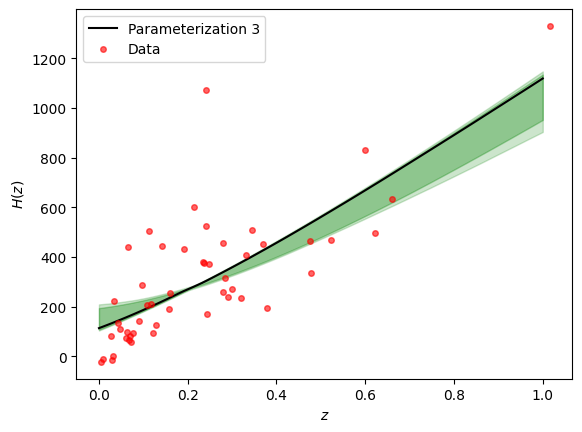

In [39]:
plt.figure()
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.errorbar(x=z_values_50, y=dm_ext_obs_50, fmt='ro', alpha=0.6, color='red', label='Data', ms=4)

# go through the solutions
for f_IGM, DM_host_0, alpha  in sampler_p2_50.results['samples']:
    # compute for each time the y value
    band.add(model_fit.DM_ext_th(z=z_test, f_IGM=f_IGM,
        DM_host_0=DM_host_0,
        model_type='p2',    
        param=alpha))

band.line(color='k', linestyle='-', label='Parameterization 3', linewidth=1.5)
# add 1 sigma quantile
band.shade(color='green', alpha=0.3)
# add wider quantile (0.01 .. 0.99)
band.shade(q=0.49, color='green', alpha=0.2)

plt.legend()
plt.savefig('Figuras/H_bestfit_50.png', format='png', dpi=600)